In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gen_dla import gen_dla
import scipy.io as sio

In [19]:
[M, C] = gen_dla(n_dim=10, n_branch=20, branch_length=100, n_drop=0, rand_multiplier=2, seed=37, sigma=0)
print(M.shape)
print(C.shape)

(2000, 10)
(2000,)


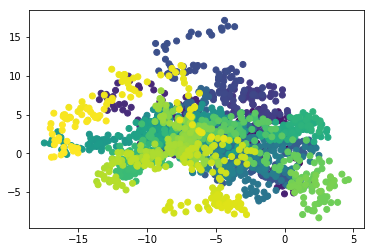

In [20]:
# Sanity check
plt.scatter(M[:, 0], M[:, 1], c=C)

In [21]:
# Create chunks with the following overlap
# 1-500, 400-900, 800-1300, 1200-1700, 1600-2000
chunk_1, chunk_2, chunk_3 = M[0:500, :], M[400:900, :], M[800:1300, :] 
chunk_4, chunk_5 = M[1200:1700, :], M[1600:2000, :]
# Append labels 
chunk_1 = np.concatenate((chunk_1, C[0:500,np.newaxis]), axis=1)
chunk_2 = np.concatenate((chunk_2, C[400:900,np.newaxis]), axis=1)
chunk_3 = np.concatenate((chunk_3, C[800:1300,np.newaxis]), axis=1) 
chunk_4 = np.concatenate((chunk_4, C[1200:1700,np.newaxis]), axis=1)
chunk_5 = np.concatenate((chunk_5, C[1600:2000,np.newaxis]), axis=1)
print(chunk_1.shape)
print(chunk_2.shape)
print(chunk_3.shape)
print(chunk_4.shape)
print(chunk_5.shape)

(500, 11)
(500, 11)
(500, 11)
(500, 11)
(400, 11)


In [22]:
sio.savemat('chunked_dla_tree.mat', {'chunk_1': chunk_1, 'chunk_2': chunk_2, 'chunk_3': chunk_3, 'chunk_4': chunk_4, 'chunk_5': chunk_5})